In [10]:
import numpy as np # 수치연산, 수학 라이브러리
import os # 파일 관리
import matplotlib # 수학적인 연산, 그래프 plottting
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import SimpleITK as sitk # 의료영상용 라이브러리
import json
import csv
import pandas as pd
from sklearn import metrics as skmet
from skimage import morphology # 일반적인 영상처리
from skimage import measure
from skimage import exposure
from skimage.transform import rotate
from skimage import io as sio
from skimage import color as skc

test_data = 'C:/Users/user1/Desktop/Changhee/project/project_dataset/Normal/000000098656/123199__0175_22190232.dcm'# 파일 경로 수정
image = sitk.ReadImage(test_data)
image

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Image *' at 0x0000023B6FB27B40> >

In [ ]:
img_arr = sitk.GetArrayFromImage(image)
print(img_arr.shape)
print(img_arr)

(1, 512, 512)
[[[-1024 -1022 -1007 ...  -971  -983 -1007]
  [-1000 -1018 -1019 ...  -990 -1019 -1024]
  [ -980  -974 -1016 ... -1016 -1024 -1024]
  ...
  [ -948  -981 -1024 ... -1024 -1024 -1024]
  [ -995  -998 -1024 ...  -995 -1019 -1024]
  [ -997  -967  -981 ...  -967  -990 -1008]]]


# Header Information #
Image Size =  (512, 512, 1)
Pixel Spacing =  (0.64453125, 0.64453125, 1.0)
Image Dimension =  3
Number of Pixel Components =  1
Minimum & Maximum pixel value(Min/Max) = -1024/1125
Image mean & std = -513.0961532592773, 481.6645535226902


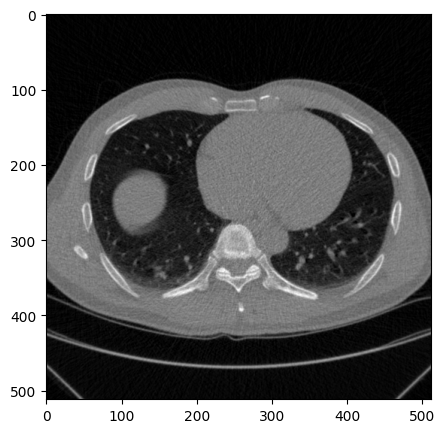

In [12]:
print('# Header Information #')
print('Image Size = ', image.GetSize())  # 이미지 크기
print('Pixel Spacing = ', image.GetSpacing())  # 픽셀 거리
print('Image Dimension = ', image.GetDimension())  # 원래 지축(높이)까지해서 3차원
print('Number of Pixel Components = ', image.GetNumberOfComponentsPerPixel())  # 흑백이라 1
print('Minimum & Maximum pixel value(Min/Max) = {}/{}'.format(np.min(img_arr), np.max(img_arr)))
print('Image mean & std = {}, {}'.format(np.mean(img_arr), np.std(img_arr)))

plt.figure(figsize=(5,5))
plt.imshow(img_arr[0], cmap='gray')

### DICOM - Normal

(1, 512, 512)
[[[-1024 -1022 -1007 ...  -971  -983 -1007]
  [-1000 -1018 -1019 ...  -990 -1019 -1024]
  [ -980  -974 -1016 ... -1016 -1024 -1024]
  ...
  [ -948  -981 -1024 ... -1024 -1024 -1024]
  [ -995  -998 -1024 ...  -995 -1019 -1024]
  [ -997  -967  -981 ...  -967  -990 -1008]]]
----------------------------------------------------
# Header Information #
Image Size =  (512, 512, 1)
Pixel Spacing =  (0.64453125, 0.64453125, 1.0)
Image Dimension =  3
Number of Pixel Components =  1
Minimum & Maximum pixel value(Min/Max) = -1024/1125
Image mean & std = -513.0961532592773, 481.6645535226902


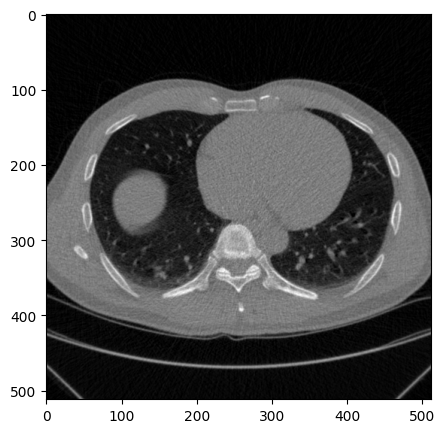

In [ ]:
import numpy as np # 수치연산, 수학 라이브러리
import os # 파일 관리
import matplotlib # 수학적인 연산, 그래프 plottting
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import SimpleITK as sitk # 의료영상용 라이브러리
import json
import csv
import pandas as pd
from sklearn import metrics as skmet
from skimage import morphology # 일반적인 영상처리
from skimage import measure
from skimage import exposure
from skimage.transform import rotate
from skimage import io as sio
from skimage import color as skc

test_data = 'C:/Users/user1/Desktop/Changhee/project/project_dataset/Normal/000000098656/123199__0175_22190232.dcm'# 파일 경로 수정
image = sitk.ReadImage(test_data)
img_arr = sitk.GetArrayFromImage(image)
print(img_arr.shape)
print(img_arr)

print("----------------------------------------------------")

print('# Header Information #')
print('Image Size = ', image.GetSize())  # 이미지 크기
print('Pixel Spacing = ', image.GetSpacing())  # 픽셀 거리
print('Image Dimension = ', image.GetDimension())  # 원래 지축(높이)까지해서 3차원
print('Number of Pixel Components = ', image.GetNumberOfComponentsPerPixel())  # 흑백이라 1
print('Minimum & Maximum pixel value(Min/Max) = {}/{}'.format(np.min(img_arr), np.max(img_arr)))
print('Image mean & std = {}, {}'.format(np.mean(img_arr), np.std(img_arr)))

plt.figure(figsize=(5,5))
plt.imshow(img_arr[0], cmap='gray')

### DICOM - PN

(1, 512, 512)
[[[-3024 -3024 -3024 ... -3024 -3024 -3024]
  [-3024 -3024 -3024 ... -3024 -3024 -3024]
  [-3024 -3024 -3024 ... -3024 -3024 -3024]
  ...
  [-3024 -3024 -3024 ... -3024 -3024 -3024]
  [-3024 -3024 -3024 ... -3024 -3024 -3024]
  [-3024 -3024 -3024 ... -3024 -3024 -3024]]]
----------------------------------------------------
# Header Information #
Image Size =  (512, 512, 1)
Pixel Spacing =  (0.595703, 0.595703, 1.0)
Image Dimension =  3
Number of Pixel Components =  1
Minimum & Maximum pixel value(Min/Max) = -3024/1441
Image mean & std = -1002.5710906982422, 1127.8986990317585


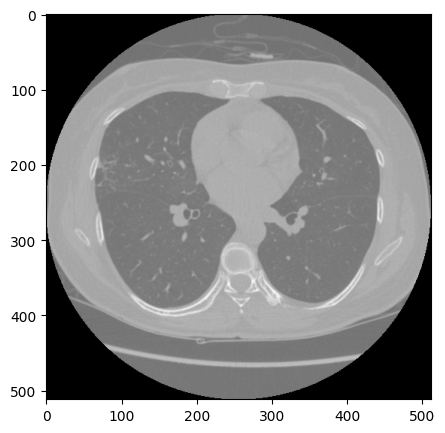

In [14]:
import numpy as np # 수치연산, 수학 라이브러리
import os # 파일 관리
import matplotlib # 수학적인 연산, 그래프 plottting
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import SimpleITK as sitk # 의료영상용 라이브러리
import json
import csv
import pandas as pd
from sklearn import metrics as skmet
from skimage import morphology # 일반적인 영상처리
from skimage import measure
from skimage import exposure
from skimage.transform import rotate
from skimage import io as sio
from skimage import color as skc

test_data = 'C:/Users/user1/Desktop/Changhee/project/project_dataset/PN/000000119865/130018_recon_0118_25133887.dcm'# 파일 경로 수정
image = sitk.ReadImage(test_data)
img_arr = sitk.GetArrayFromImage(image)
print(img_arr.shape)
print(img_arr)

print("----------------------------------------------------")

print('# Header Information #')
print('Image Size = ', image.GetSize())  # 이미지 크기
print('Pixel Spacing = ', image.GetSpacing())  # 픽셀 거리
print('Image Dimension = ', image.GetDimension())  # 원래 지축(높이)까지해서 3차원
print('Number of Pixel Components = ', image.GetNumberOfComponentsPerPixel())  # 흑백이라 1
print('Minimum & Maximum pixel value(Min/Max) = {}/{}'.format(np.min(img_arr), np.max(img_arr)))
print('Image mean & std = {}, {}'.format(np.mean(img_arr), np.std(img_arr)))

plt.figure(figsize=(5,5))
plt.imshow(img_arr[0], cmap='gray')

---

### NIfTI - Normal

NumPy 배열 형태(shape): (512, 512, 317)
NumPy 배열 dtype    : float64

----------------------------------------------------
# 헤더 정보 출력 #
볼륨 크기 (voxel)          = (317, 512, 512)
픽셀 간격 (mm)            = (1.0, 1.0, 1.0)
이미지 차원               = 3
픽셀 구성 요소 개수       = 1
이미지 원점 (Origin, mm)   = (0.0, 0.0, 0.0)
방향 코사인 (Direction)   = (-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
최소/최대 intensity       = -1024.0/2976.0
평균/표준편차 intensity    = -494.64, 494.13
----------------------------------------------------
vol.shape (Z, Y, X): (512, 512, 317)
GetSize()  (X, Y, Z): (317, 512, 512)


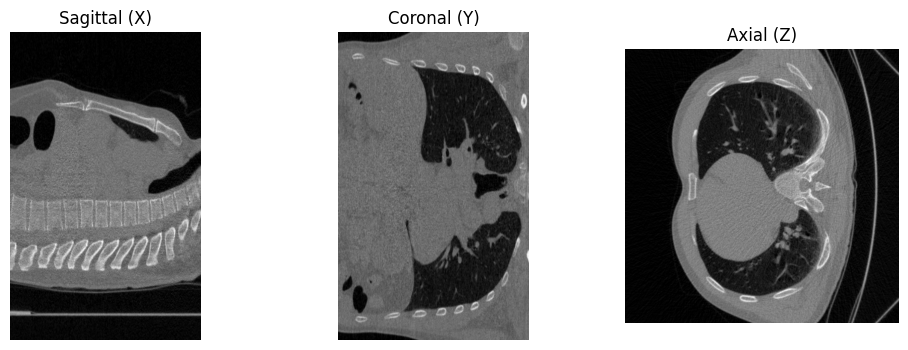

In [ ]:
import numpy as np           # 수치 연산 라이브러리
import os                    # 파일·디렉터리 관리
import matplotlib            # 그래프 라이브러리
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import SimpleITK as sitk     # 의료영상 처리 라이브러리
import json
import csv
import pandas as pd
from sklearn import metrics as skmet
from skimage import morphology, measure, exposure
from skimage.transform import rotate
from skimage import io as sio
from skimage import color as skc

# 1. NIfTI 볼륨 읽기
file_path = 'C:/Users/user1/Desktop/Changhee/project/project_data_nii/Normal/000000098656.nii.gz'
image     = sitk.ReadImage(file_path)
vol       = sitk.GetArrayFromImage(image)    # shape = (depth, height, width)

# 2. 배열 및 헤더 정보 출력
# SitkImage → NumPy 배열 (shape = (Z, Y, X))
img_arr = sitk.GetArrayFromImage(image)
print("NumPy 배열 형태(shape):", img_arr.shape)
print("NumPy 배열 dtype    :", img_arr.dtype)
print()

print("----------------------------------------------------")
print("# 헤더 정보 출력 #")
print("볼륨 크기 (voxel)          =", image.GetSize())               # (X, Y, Z)
print("픽셀 간격 (mm)            =", image.GetSpacing())            # (X, Y, Z)
print("이미지 차원               =", image.GetDimension())          # 일반적으로 3
print("픽셀 구성 요소 개수       =", image.GetNumberOfComponentsPerPixel())
print("이미지 원점 (Origin, mm)   =", image.GetOrigin())
print("방향 코사인 (Direction)   =", image.GetDirection())
print("최소/최대 intensity       = {}/{}".format(np.min(img_arr), np.max(img_arr)))
print("평균/표준편차 intensity    = {:.2f}, {:.2f}".format(np.mean(img_arr), np.std(img_arr)))
print("----------------------------------------------------")

# 3) 배열 순서 확인
print("vol.shape (Z, Y, X):", vol.shape)
print("GetSize()  (X, Y, Z):", image.GetSize())

# 4) 가운데 슬라이스 인덱스 계산
z_mid = vol.shape[0] // 2   # <- NumPy 배열 기준 Z축
y_mid = vol.shape[1] // 2   # coronal
x_mid = vol.shape[2] // 2   # sagittal

axial    = vol[z_mid    , :, :]
coronal  = vol[:, y_mid  , :]
sagittal = vol[:, :, x_mid]

fig, axes = plt.subplots(1,3, figsize=(12,4))
for ax, img, title in zip(axes, [axial, coronal, sagittal],
                          ['Sagittal (X)', 'Coronal (Y)', 'Axial (Z)']):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.show()


NumPy 배열 형태(shape): (512, 512, 268)
NumPy 배열 dtype    : float64

----------------------------------------------------
# 헤더 정보 출력 #
볼륨 크기 (voxel)          = (268, 512, 512)
픽셀 간격 (mm)            = (1.0, 1.0, 1.0)
이미지 차원               = 3
픽셀 구성 요소 개수       = 1
이미지 원점 (Origin, mm)   = (0.0, 0.0, 0.0)
방향 코사인 (Direction)   = (-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
최소/최대 intensity       = -1024.0/1864.0
평균/표준편차 intensity    = -562.75, 498.86
----------------------------------------------------
vol.shape (Z, Y, X): (512, 512, 268)
GetSize()  (X, Y, Z): (268, 512, 512)


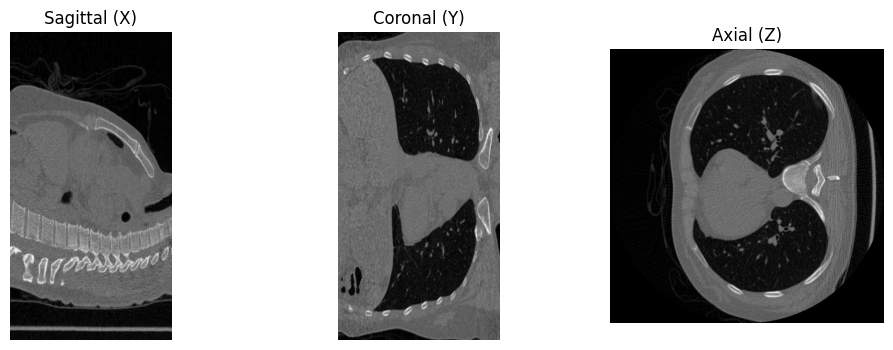

In [ ]:
import numpy as np           # 수치 연산 라이브러리
import os                    # 파일·디렉터리 관리
import matplotlib            # 그래프 라이브러리
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import SimpleITK as sitk     # 의료영상 처리 라이브러리
import json
import csv
import pandas as pd
from sklearn import metrics as skmet
from skimage import morphology, measure, exposure
from skimage.transform import rotate
from skimage import io as sio
from skimage import color as skc

# 1. NIfTI 볼륨 읽기
file_path = 'C:/Users/user1/Desktop/Changhee/project/project_data_nii/Normal/000000098783.nii.gz'
image     = sitk.ReadImage(file_path)
vol       = sitk.GetArrayFromImage(image)    # shape = (depth, height, width)

# 2. 배열 및 헤더 정보 출력
# SitkImage → NumPy 배열 (shape = (Z, Y, X))
img_arr = sitk.GetArrayFromImage(image)
print("NumPy 배열 형태(shape):", img_arr.shape)
print("NumPy 배열 dtype    :", img_arr.dtype)
print()

print("----------------------------------------------------")
print("# 헤더 정보 출력 #")
print("볼륨 크기 (voxel)          =", image.GetSize())               # (X, Y, Z)
print("픽셀 간격 (mm)            =", image.GetSpacing())            # (X, Y, Z)
print("이미지 차원               =", image.GetDimension())          # 일반적으로 3
print("픽셀 구성 요소 개수       =", image.GetNumberOfComponentsPerPixel())
print("이미지 원점 (Origin, mm)   =", image.GetOrigin())
print("방향 코사인 (Direction)   =", image.GetDirection())
print("최소/최대 intensity       = {}/{}".format(np.min(img_arr), np.max(img_arr)))
print("평균/표준편차 intensity    = {:.2f}, {:.2f}".format(np.mean(img_arr), np.std(img_arr)))
print("----------------------------------------------------")

# 3) 배열 순서 확인
print("vol.shape (Z, Y, X):", vol.shape)
print("GetSize()  (X, Y, Z):", image.GetSize())

# 4) 가운데 슬라이스 인덱스 계산
z_mid = vol.shape[0] // 2   # <- NumPy 배열 기준 Z축
y_mid = vol.shape[1] // 2   # coronal
x_mid = vol.shape[2] // 2   # sagittal

axial    = vol[z_mid    , :, :]
coronal  = vol[:, y_mid  , :]
sagittal = vol[:, :, x_mid]

fig, axes = plt.subplots(1,3, figsize=(12,4))
for ax, img, title in zip(axes, [axial, coronal, sagittal],
                          ['Sagittal (X)', 'Coronal (Y)', 'Axial (Z)']):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.show()


### Hounsfield Unit(HU) - 히스토그램

--- HU 값 분석 결과 ---
최소 HU: -1024.00
최대 HU: 1125.00
평균 HU: -513.10


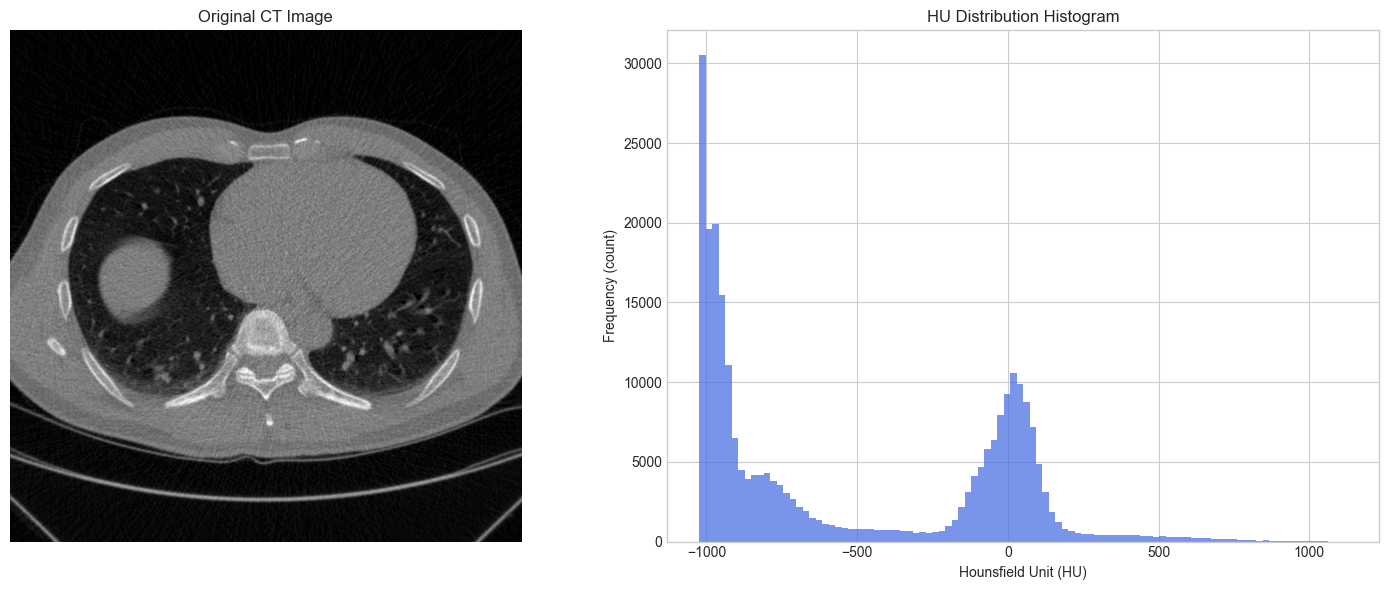

In [7]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

try:
    # --- 1. 파일 로딩 ---
    # 여기에 본인의 DICOM 파일 경로를 입력하세요.
    file_path = 'C:/Users/user1/Desktop/Changhee/project/data_DICOM/Normal/000000098656/123199__0175_22190232.dcm'
    dcm_file = pydicom.dcmread(file_path)

    # --- 2. HU 변환 ---
    # DICOM 헤더에서 Slope와 Intercept 값을 가져옵니다.
    slope = float(dcm_file.RescaleSlope)
    intercept = float(dcm_file.RescaleIntercept)
    
    # 원본 픽셀 데이터를 가져옵니다.
    pixel_array = dcm_file.pixel_array
    
    # HU 단위로 변환합니다.
    hu_array = pixel_array.astype(np.float64) * slope + intercept
    
    print("--- HU 값 분석 결과 ---")
    print(f"최소 HU: {np.min(hu_array):.2f}")
    print(f"최대 HU: {np.max(hu_array):.2f}")
    print(f"평균 HU: {np.mean(hu_array):.2f}")
    
    # --- 3. 시각화 ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # 원본 CT 이미지
    axes[0].set_title('Original CT Image')
    axes[0].imshow(hu_array, cmap='gray')
    axes[0].axis('off')
    
    # HU 분포 히스토그램
    axes[1].set_title('HU Distribution Histogram')
    axes[1].hist(hu_array.flatten(), bins=100, color='royalblue', alpha=0.7)
    axes[1].set_xlabel('Hounsfield Unit (HU)')
    axes[1].set_ylabel('Frequency (count)')
    
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"에러: '{file_path}' 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
except Exception as e:
    print(f"에러 발생: {e}")

--- HU 값 분석 결과 ---
최소 HU: -3024.00
최대 HU: 1441.00
평균 HU: -1002.57


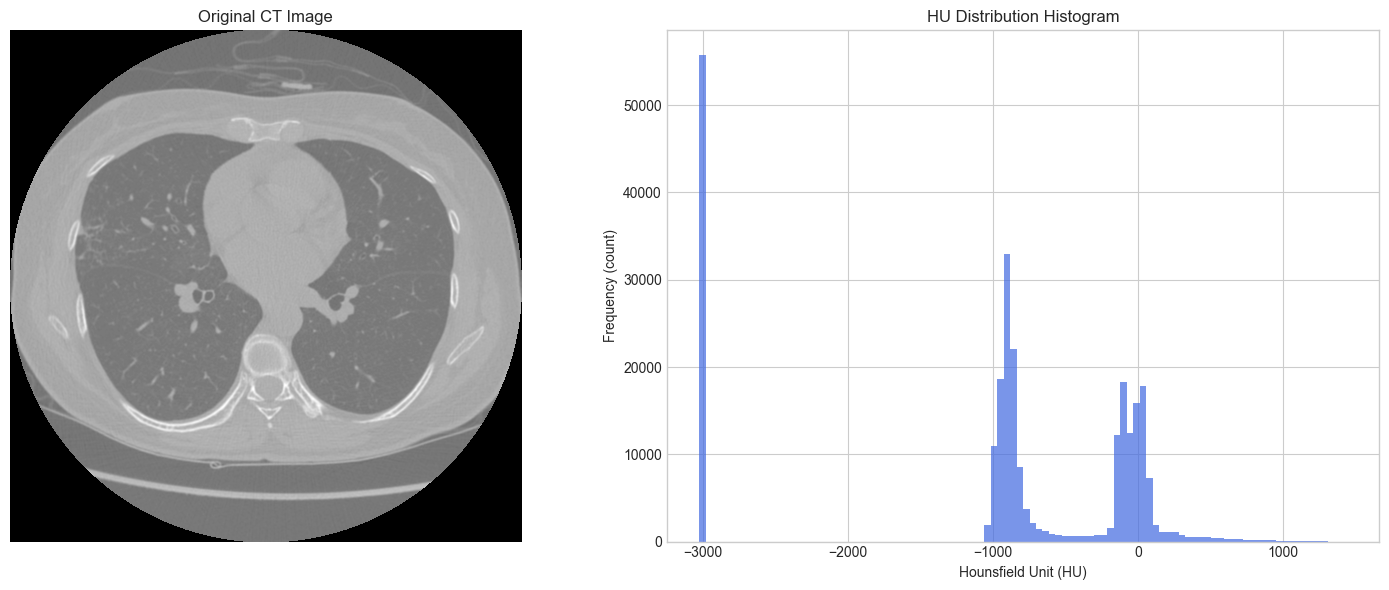

In [8]:
# PN/000000119865/130018_recon_0118_25133887.dcm
import pydicom
import numpy as np
import matplotlib.pyplot as plt

try:
    # --- 1. 파일 로딩 ---
    # 여기에 본인의 DICOM 파일 경로를 입력하세요.
    file_path = 'C:/Users/user1/Desktop/Changhee/project/data_DICOM/PN/000000119865/130018_recon_0118_25133887.dcm'
    dcm_file = pydicom.dcmread(file_path)

    # --- 2. HU 변환 ---
    # DICOM 헤더에서 Slope와 Intercept 값을 가져옵니다.
    slope = float(dcm_file.RescaleSlope)
    intercept = float(dcm_file.RescaleIntercept)
    
    # 원본 픽셀 데이터를 가져옵니다.
    pixel_array = dcm_file.pixel_array
    
    # HU 단위로 변환합니다.
    hu_array = pixel_array.astype(np.float64) * slope + intercept
    
    print("--- HU 값 분석 결과 ---")
    print(f"최소 HU: {np.min(hu_array):.2f}")
    print(f"최대 HU: {np.max(hu_array):.2f}")
    print(f"평균 HU: {np.mean(hu_array):.2f}")
    
    # --- 3. 시각화 ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # 원본 CT 이미지
    axes[0].set_title('Original CT Image')
    axes[0].imshow(hu_array, cmap='gray')
    axes[0].axis('off')
    
    # HU 분포 히스토그램
    axes[1].set_title('HU Distribution Histogram')
    axes[1].hist(hu_array.flatten(), bins=100, color='royalblue', alpha=0.7)
    axes[1].set_xlabel('Hounsfield Unit (HU)')
    axes[1].set_ylabel('Frequency (count)')
    
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"에러: '{file_path}' 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
except Exception as e:
    print(f"에러 발생: {e}")

In [ ]:
import os
import pydicom
import numpy as np
import sys

def get_hu_range_for_dataset(directory):
    """
    Calculates the minimum and maximum Hounsfield Unit (HU) values for all DICOM files
    in a directory and its subdirectories.

    Args:
        directory (str): The path to the directory containing DICOM files.

    Returns:
        tuple: A tuple containing the global minimum and maximum HU values found.
               Returns (None, None) if no DICOM files are found.
    """
    global_min_hu = float('inf')
    global_max_hu = float('-inf')
    dicom_files_found = False
    file_count = 0

    # First, count the total number of files to process for progress indication
    total_files = sum([len(files) for r, d, files in os.walk(directory)])
    
    print(f"Searching for DICOM files in: {directory}")
    print(f"Found {total_files} total files to check.")

    for root, _, files in os.walk(directory):
        for filename in files:
            filepath = os.path.join(root, filename)
            file_count += 1
            
            # Print progress
            progress = (file_count / total_files) * 100
            sys.stdout.write(f"\rProcessing file {file_count}/{total_files} ({progress:.2f}%) - {os.path.basename(filepath)}")
            sys.stdout.flush()

            try:
                # Read the DICOM file, deferring pixel data loading for efficiency
                dcm = pydicom.dcmread(filepath, stop_before_pixels=True, force=True)

                # Check if it's a CT image by looking for Rescale Slope/Intercept
                if not hasattr(dcm, 'RescaleSlope') or not hasattr(dcm, 'RescaleIntercept'):
                    continue
                
                # Now read the full file since it's likely a valid CT
                dcm = pydicom.dcmread(filepath, force=True)

                # Get the pixel array
                image = dcm.pixel_array

                # Convert to HU
                rescale_slope = dcm.RescaleSlope
                rescale_intercept = dcm.RescaleIntercept
                
                # Ensure calculations are done with floating point numbers
                hu_image = image.astype(np.float64) * float(rescale_slope) + float(rescale_intercept)

                # Update global min and max
                min_hu = np.min(hu_image)
                max_hu = np.max(hu_image)

                if min_hu < global_min_hu:
                    global_min_hu = min_hu
                if max_hu > global_max_hu:
                    global_max_hu = max_hu

                dicom_files_found = True

            except Exception:
                # Ignore files that are not valid DICOM files or cause other errors
                continue

    sys.stdout.write("\n") # Move to the next line after progress bar
    
    if not dicom_files_found:
        return None, None

    return global_min_hu, global_max_hu

if __name__ == '__main__':
    # The script is expected to be in the project root, so 'data_DICOM' is a subdirectory.
    dicom_directory = 'C:/Users/user1/Desktop/Changhee/project/data_DICOM'
    
    if not os.path.isdir(dicom_directory):
        print(f"Error: Directory '{dicom_directory}' not found.")
        print("Please make sure the script is in the correct project directory and the 'data_DICOM' folder exists.")
    else:
        min_val, max_val = get_hu_range_for_dataset(dicom_directory)

        if min_val is not None and max_val is not None:
            print("\n--- Overall HU Range for the Dataset ---")
            print(f"Minimum HU value: {min_val}")
            print(f"Maximum HU value: {max_val}")
            print("----------------------------------------")
        else:
            print("\nNo valid DICOM files with HU information were found in the specified directory.")


Error: Directory 'data_DICOM' not found.
Please make sure the script is in the correct project directory and the 'data_DICOM' folder exists.
